### Student Information
Name: Nora Lizarti

Student ID:109162864

GitHub ID: https://github.com/Noralizarti/SNHC_7450_HW2/

---

### Instructions

1. First: do the **take home** exercises in Part 1 of the [SNHC7450-Lab2-master Repo](https://github.com/fhcalderon87/SNHC7450_Lab2_master/blob/main/SNHC4750_Lab2_master.ipynb). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [SNHC7450-Lab2-master Repo](https://github.com/fhcalderon87/SNHC7450_Lab2_master/blob/main/SNHC4750_Lab2_master.ipynb) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 40% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and/or textbooks for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generat a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


Create a new repository on Github and upload your homework to it. Submit a link to the repository to my email __BEFORE the deadline (Dec. 27th 11:59 pm, Monday)__. 

# Table of Contents



1. Take Home Exercise
 - Part 1. Data Analysis and Visualization
    - Exercise 1
    - Exercise 2
    - Exercise 3
    - Exercise 4
    - Exercise 5
    - Exercise 6-1
    - Exercise 6-2
    - Exercise 7
2. SNHC7450-Lab2-master Repo on the new dataset
  - Part 1. Data Analysis and Visualization
    - 1.1 Data Transformation
      - Exercise 1 
    - 1.2 Data Mining Using Pandas
      - Exercise 2 
    - 1.3 Data PreProccessing
      - Exercise 3
      - Exercise 4 
      - Exercise 5
      - Exercise 6-1
      - Exercise 6-2
      - Exercise 7    
    - 1.4 Data Exploration
  - Part 2. Neural Word Embeddings
    - 2.1. Data preparation
    - 2.2. Deep Learning
    - Exercise 8
    - 2.3. Word2Vector
    - 2.4. High-dimension Visualization: t-SNE
    - Exercise 9

3. Attempt the following tasks on the new dataset
 - 3.1 Data Preparation
 - 3.2 Generate New Visualization
 - 3.3 TF-IDF features
 - 3.4 Naive Bayes Clasifier
    - 3.4.1 TF-IDF features
    - 3.4.2 Word Frequency Features

# **1. TAKE HOME EXERCISE**
# **Part 1. Data Analysis and Visualization**

In [2]:
!pip install matplotlib --upgrade

>Do the take home exercises in Part 1 of the SNHC7450-Lab2-master Repo. You may need to copy some cells from the Lab notebook to this notebook. This part is worth 20% of your grade

###**Preparation**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!ls "/content/drive/My Drive/SN/SNHC7450_Lab2_master-main/helpers"

data_mining_helpers.py	__init__.py  __pycache__  text_analysis.py


In [5]:
!cp "/content/drive/My Drive/DATA MINING/LAB PROJECT 2/TUGAS LABPROJECT/helpers/data_mining_helpers.py" "data_mining_helpers.py"

In [6]:
import plotly.express as py
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import data_mining_helpers as dmh
import plotly.graph_objs as go
import math
%matplotlib inline

In [7]:
categories=['alt.atheism','soc.religion.christian','comp.graphics','sci.med']
twenty_train=fetch_20newsgroups(subset='train',categories=categories,shuffle=True,random_state=42)
twenty_train.data[0:5]

['From: sd345@city.ac.uk (Michael Collier)\nSubject: Converting images to HP LaserJet III?\nNntp-Posting-Host: hampton\nOrganization: The City University\nLines: 14\n\nDoes anyone know of a good way (standard PC application/PD utility) to\nconvert tif/img/tga files into LaserJet III format.  We would also like to\ndo the same, converting to HPGL (HP plotter) files.\n\nPlease email any response.\n\nIs this the correct group?\n\nThanks in advance.  Michael.\n-- \nMichael Collier (Programmer)                 The Computer Unit,\nEmail: M.P.Collier@uk.ac.city                The City University,\nTel: 071 477-8000 x3769                      London,\nFax: 071 477-8565                            EC1V 0HB.\n',
 "From: ani@ms.uky.edu (Aniruddha B. Deglurkar)\nSubject: help: Splitting a trimming region along a mesh \nOrganization: University Of Kentucky, Dept. of Math Sciences\nLines: 28\n\n\n\n\tHi,\n\n\tI have a problem, I hope some of the 'gurus' can help me solve.\n\n\tBackground of the probl

In [8]:
# obtain the documents containing the categories provided
from sklearn.datasets import fetch_20newsgroups

twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

In [9]:
twenty_train.target

array([1, 1, 3, ..., 2, 2, 2])

In [10]:
import pandas as pd

# construct dataframe from a list
Xnora = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

In [11]:
len(Xnora)

2257

In [12]:
for t in Xnora["text"][:3]:
    print(t)

From: sd345@city.ac.uk (Michael Collier) Subject: Converting images to HP LaserJet III? Nntp-Posting-Host: hampton Organization: The City University Lines: 14  Does anyone know of a good way (standard PC application/PD utility) to convert tif/img/tga files into LaserJet III format.  We would also like to do the same, converting to HPGL (HP plotter) files.  Please email any response.  Is this the correct group?  Thanks in advance.  Michael. --  Michael Collier (Programmer)                 The Computer Unit, Email: M.P.Collier@uk.ac.city                The City University, Tel: 071 477-8000 x3769                      London, Fax: 071 477-8565                            EC1V 0HB. 
From: ani@ms.uky.edu (Aniruddha B. Deglurkar) Subject: help: Splitting a trimming region along a mesh  Organization: University Of Kentucky, Dept. of Math Sciences Lines: 28    	Hi,  	I have a problem, I hope some of the 'gurus' can help me solve.  	Background of the problem: 	I have a rectangular mesh in the uv

In [13]:
# add category to the dataframe
Xnora['category'] = twenty_train.target

In [14]:
# add category label also
Xnora['category_name'] = Xnora.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [15]:
Xnora[0:10][["text", "category_name"]]

text           category_name
0  From: sd345@city.ac.uk (Michael Collier) Subje...           comp.graphics
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...           comp.graphics
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  soc.religion.christian
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  soc.religion.christian
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  soc.religion.christian
5  From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...  soc.religion.christian
6  From: jodfishe@silver.ucs.indiana.edu (joseph ...  soc.religion.christian
7  From: aldridge@netcom.com (Jacquelin Aldridge)...                 sci.med
8  From: geb@cs.pitt.edu (Gordon Banks) Subject: ...                 sci.med
9  From: libman@hsc.usc.edu (Marlena Libman) Subj...                 sci.med

### **Exercise 1** 
>Try to fecth records belonging to the ```comp.graphics``` category, and query every 10th record. Only show the first 5 records.

In [16]:
#To filter the records which only belong to comp.graphics category
Xnora_filter=Xnora.loc[Xnora.category_name == "comp.graphics"]

In [17]:
#Only show first 5 category
Xnora_filter[0:5]

text  category  category_name
0   From: sd345@city.ac.uk (Michael Collier) Subje...         1  comp.graphics
1   From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1  comp.graphics
11  From: amjad@eng.umd.edu (Amjad A Soomro) Subje...         1  comp.graphics
14  From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...         1  comp.graphics
15  From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...         1  comp.graphics

### **Exercise 2** 
>There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.
>Please check the data and the process below, describe what you observe and why it happened.   
>$Hint$ :  why `.isnull()` didn't work?

In [18]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B', },               
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [19]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer**
>This happen because empty values such as ( ), { }, [ ],"  ", 0, and value 'Nan' and 'None' will always return **False**. And return **True** on a boolean same-sized object indicating if the values are **NA**. Which is **NA** here is NA values, such as None or numpy.

For example : 
>Its return **True** on index 0,1,and 4 because :
*   index 0 because it's an NA values (np.nan).
*   index 1 because it's an NA values
*   index 4 because None also consider as NA values

> It's return **False** on index 2, 3, and 5 because :
*   index 2 it's an empty string. An empty string is not considered as NA values
*   index 3 it's an string values. Everything inside '' is considered as string values.
*   index 5 it's an empty string. An empty string is not considered as NA values.





### **Exercise 3** 
>We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

####**Preparation**

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [21]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

In [22]:
Xnora_sample = Xnora.sample(n=1000) #random state

In [23]:
len(Xnora_sample)

1000

In [24]:
Xnora_sample[0:4]

text  ...  category_name
701   From: wright@duca.hi.com (David Wright) Subjec...  ...        sci.med
1132  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...  ...        sci.med
1874  Subject: Re: Video in/out From: djlewis@ualr.e...  ...  comp.graphics
1253  From: choueiry@liasun1.epfl.ch (Berthe Y. Chou...  ...        sci.med

[4 rows x 3 columns]

soc.religion.christian    599
sci.med                   594
comp.graphics             584
alt.atheism               480
Name: category_name, dtype: int64


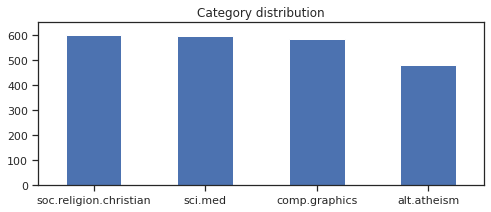

In [25]:
print(Xnora.category_name.value_counts())

# plot barchart for X_sample
Xnora_ori=Xnora.category_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

sci.med                   278
soc.religion.christian    275
comp.graphics             236
alt.atheism               211
Name: category_name, dtype: int64


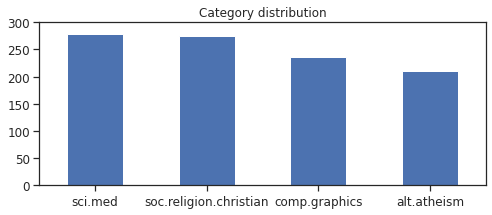

In [26]:
print(Xnora_sample.category_name.value_counts())

# plot barchart for X_sample
Xnora_samp=Xnora_sample.category_name.value_counts().plot(kind = 'bar',
                                           title = 'Category distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

####**Chart of side-by-side comparison of the distribution between the two datasets**

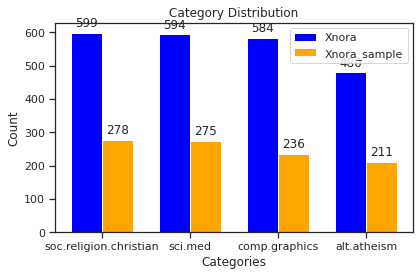

In [27]:
labels = ['soc.religion.christian', 'sci.med', 'comp.graphics', 'alt.atheism']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, Xnora.category_name.value_counts(), width, label='Xnora', color='blue')
rects2 = ax.bar(x + width/2, Xnora_sample.category_name.value_counts(), width, label='Xnora_sample', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Categories')
ax.set_title('Category Distribution')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

One thing that stood out from the both datasets, is that the distribution of the categories remain relatively the same, which is a good sign for us data scientist. There are many ways to conduct sampling on the dataset and still obtain a representative enough dataset. That is not the main focus in this notebook, but if you would like to know more about sampling and how the `sample` feature works, just reference the Pandas documentation and you will find interesting ways to conduct more advanced sampling.

### **Exercise 4**
>Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

####**Preparation** **& Answer**

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
# takes a like a minute or two to process
Xnora['unigrams'] = Xnora['text'].apply(lambda x: dmh.tokenize_text(x))

In [30]:
Xnora[0:4]["unigrams"]

0    [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1    [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2    [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3    [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
Name: unigrams, dtype: object

In [31]:
Xnora[0:4]

text  ...                                           unigrams
0  From: sd345@city.ac.uk (Michael Collier) Subje...  ...  [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...  ...  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  ...  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  ...  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...

[4 rows x 4 columns]

In [32]:
list(Xnora[0:1]['unigrams'])

[['From',
  ':',
  'sd345',
  '@',
  'city.ac.uk',
  '(',
  'Michael',
  'Collier',
  ')',
  'Subject',
  ':',
  'Converting',
  'images',
  'to',
  'HP',
  'LaserJet',
  'III',
  '?',
  'Nntp-Posting-Host',
  ':',
  'hampton',
  'Organization',
  ':',
  'The',
  'City',
  'University',
  'Lines',
  ':',
  '14',
  'Does',
  'anyone',
  'know',
  'of',
  'a',
  'good',
  'way',
  '(',
  'standard',
  'PC',
  'application/PD',
  'utility',
  ')',
  'to',
  'convert',
  'tif/img/tga',
  'files',
  'into',
  'LaserJet',
  'III',
  'format',
  '.',
  'We',
  'would',
  'also',
  'like',
  'to',
  'do',
  'the',
  'same',
  ',',
  'converting',
  'to',
  'HPGL',
  '(',
  'HP',
  'plotter',
  ')',
  'files',
  '.',
  'Please',
  'email',
  'any',
  'response',
  '.',
  'Is',
  'this',
  'the',
  'correct',
  'group',
  '?',
  'Thanks',
  'in',
  'advance',
  '.',
  'Michael',
  '.',
  '--',
  'Michael',
  'Collier',
  '(',
  'Programmer',
  ')',
  'The',
  'Computer',
  'Unit',
  ',',
  'Emai

In [33]:
#Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
Xnora_counts = count_vect.fit_transform(Xnora.text)

In [34]:
#use the default analyzer provided by CountVectorizer
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

####Explore Term-Document matrix

In [35]:
# We can check the shape of this matrix by:
Xnora_counts.shape

(2257, 35788)

In [36]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names()[0:10]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



['00',
 '000',
 '0000',
 '0000001200',
 '000005102000',
 '0001',
 '000100255pixel',
 '00014',
 '000406',
 '0007']

In [37]:
Xnora[0:5]

text  ...                                           unigrams
0  From: sd345@city.ac.uk (Michael Collier) Subje...  ...  [From, :, sd345, @, city.ac.uk, (, Michael, Co...
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...  ...  [From, :, ani, @, ms.uky.edu, (, Aniruddha, B....
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...  ...  [From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...
3  From: s0612596@let.rug.nl (M.M. Zwart) Subject...  ...  [From, :, s0612596, @, let.rug.nl, (, M.M, ., ...
4  From: stanly@grok11.columbiasc.ncr.com (stanly...  ...  [From, :, stanly, @, grok11.columbiasc.ncr.com...

[5 rows x 4 columns]

In [38]:
# we convert from sparse array to normal array
Xnora_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [39]:
#Using the vectorizer to generate word frequency vector
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [40]:
#puting a 00 in the document to see if it is detected
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [41]:
# ploting first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names()[0:20]]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [42]:
plot_x

['term_00',
 'term_000',
 'term_0000',
 'term_0000001200',
 'term_000005102000',
 'term_0001',
 'term_000100255pixel',
 'term_00014',
 'term_000406',
 'term_0007',
 'term_000usd',
 'term_0010',
 'term_001004',
 'term_0010580b',
 'term_001125',
 'term_001200201pixel',
 'term_0014',
 'term_001642',
 'term_00196',
 'term_002']

In [43]:
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(Xnora.index)[0:20]]

In [44]:
plot_z = Xnora_counts[0:20, 0:20].toarray()

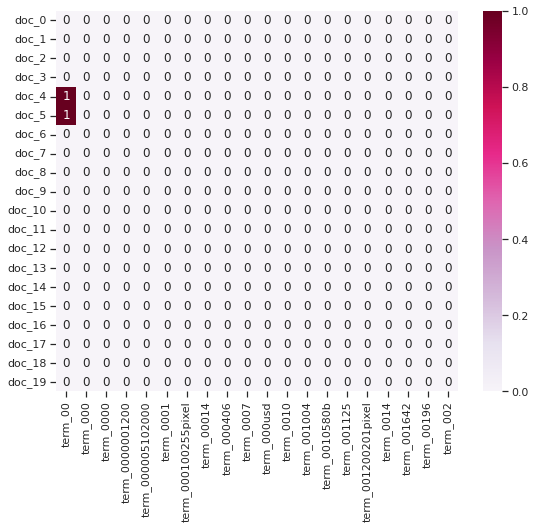

In [45]:
#Heat map visualitation using Seaborn
import seaborn as sns

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

### **Exercise 5** 
>From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

We had a memory issue when we had to plot multiple vocabularies utilizing SNS heatmap, and we couldn't read the graph clearly. To make that work go faster, I'll employ a token frequency distribution visualizer, which can count any observable event. So, using CountVectorizer, I tokenize and vectorize the corpus data, then create a FreqDisctVisualizer object and call fit() on it with the count vectorized documents and the features (i.e. the words from the corpus) to compute the frequency distribution. The top 50 most frequent things in the corpus will be displayed, with terms listed along the y-axis and frequency counts shown at the x-axis values.

In [46]:
import yellowbrick
from yellowbrick.text import FreqDistVisualizer

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



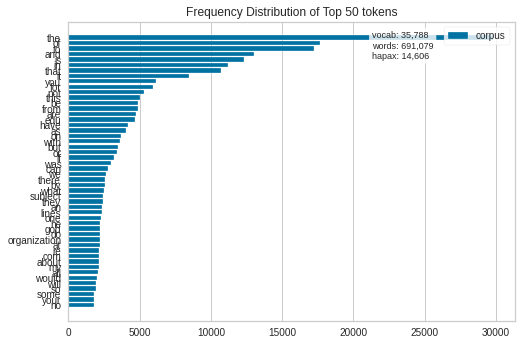

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [47]:
features_names=count_vect.get_feature_names()
visualizer = FreqDistVisualizer(features=features_names)
visualizer.fit(Xnora_counts)
visualizer.poof()

or if we want only to know the most frequent term we can also using worldcloud to visualize our data.

In [48]:
#Worldcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

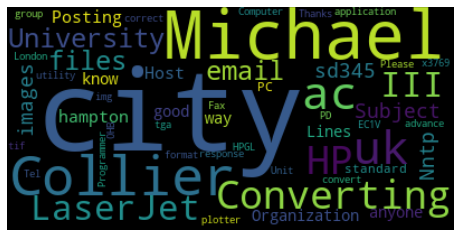

In [49]:
#displaying only word in index 0

textnora = Xnora.text[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(textnora)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

###**Exercise 6**
>Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

>$Hint$: you can refer to Axes3D in the documentation.

####**Preparation & Answer**

In [50]:
from sklearn.decomposition import PCA
Xnora_reduced = PCA(n_components = 3).fit_transform(Xnora_counts.toarray())
Xnora_reduced.shape

(2257, 3)

In [51]:
categories

['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

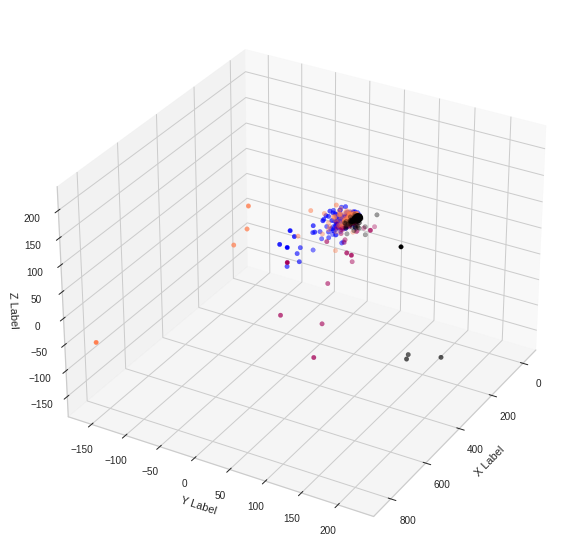

In [52]:
#plot the result use 3D plot

col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = Xnora_reduced[Xnora['category_name'] == category].T[0]
    ys = Xnora_reduced[Xnora['category_name'] == category].T[1]
    zs = Xnora_reduced[Xnora['category_name'] == category].T[2]
    
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(azim=30)
plt.show()

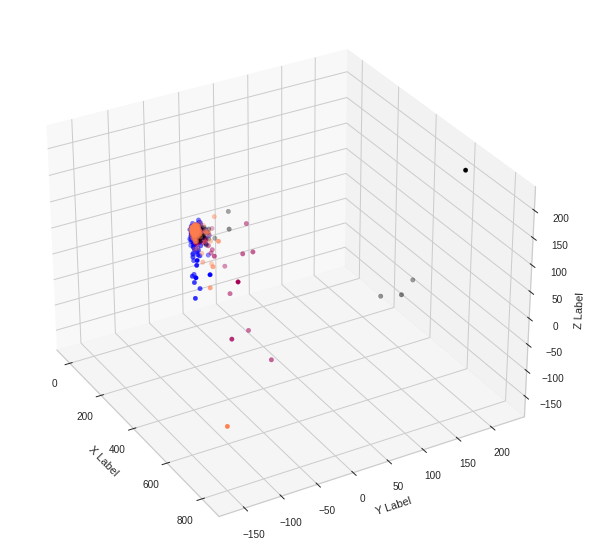

In [53]:
#plot the result use 3D plot

col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = Xnora_reduced[Xnora['category_name'] == category].T[0]
    ys = Xnora_reduced[Xnora['category_name'] == category].T[1]
    zs = Xnora_reduced[Xnora['category_name'] == category].T[2]
    
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(azim=-30)
plt.show()

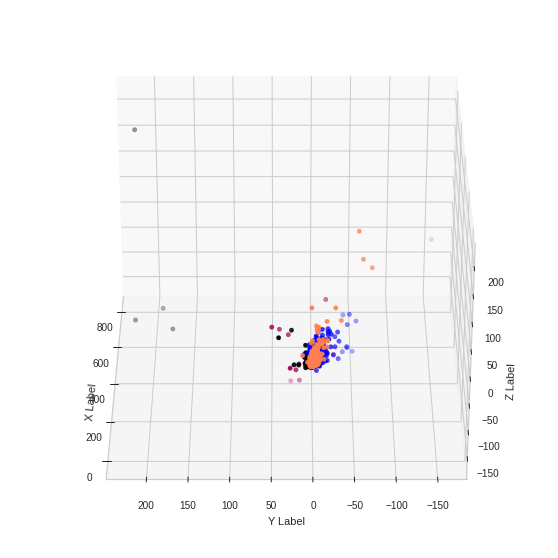

In [54]:
#plot the result use 3D plot

col = ['coral', 'blue', 'black', 'm']

fig = plt.figure(figsize = (25,10))
ax = plt.axes(projection='3d')

for c, category in zip(col, categories):
    xs = Xnora_reduced[Xnora['category_name'] == category].T[0]
    ys = Xnora_reduced[Xnora['category_name'] == category].T[1]
    zs = Xnora_reduced[Xnora['category_name'] == category].T[2]
    
   
    ax.scatter(xs, ys,zs, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')
ax.view_init(azim=180)
plt.show()

The great thing about what we have done so far is that we now open doors to new problems. Let us be optimistic. Even though we have the problem of sparsity and a very high dimensional data, we are now closer to uncovering wonders from the data. You see, the price you pay for the hard work is worth it because now you are gaining a lot of knowledge from what was just a list of what appeared to be irrelevant articles. Just the fact that you can blow up the data and find out interesting characteristics about the dataset in just a couple lines of code, is something that truly inspires me to practise Data Science. That's the motivation right there!

###**Exercise 6** 
>The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize using plotly.


In [55]:
!pip install chart_studio

In [56]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [57]:
from plotly.offline import iplot

In [58]:
def get_trace(X_pca, data, category, color):
    """ Build trace for plotly chart based on category """
    trace = go.Scatter3d(
        x=X_pca[data.apply(lambda x: True if x==category else False),0],
        y=X_pca[data.apply(lambda x: True if x==category else False),1],
        z=X_pca[data.apply(lambda x: True if x==category else False),2],
        mode='markers',
        marker=dict(
            size=4,
            line=dict(
                color=color,
                width=0.2
            ),
            opacity=0.8
        ),
        text=data[data.apply(lambda x: True if x==category else False).tolist()]
    )
    return trace

In [59]:
trace1 = get_trace(Xnora_reduced, Xnora["category_name"], "alt.atheism", "rgb(71,233,163)")
trace2 = get_trace(Xnora_reduced, Xnora["category_name"], "soc.religion.christian", "rgb(52,133,252)")
trace3 = get_trace(Xnora_reduced, Xnora["category_name"], "comp.graphics", "rgb(229,65,136)")
trace4 = get_trace(Xnora_reduced, Xnora["category_name"], "sci.med", "rgb(99,151,68)")

In [60]:
data = [trace1, trace2, trace3, trace4]

In [61]:
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

###**Exercise 7** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [62]:
term_frequencies = []
for j in range(0,Xnora_counts.shape[1]):
    term_frequencies.append(sum(Xnora_counts[:,j].toarray()))

In [63]:
term_frequencies = np.asarray(Xnora_counts.sum(axis=0))[0]

In [64]:
term_frequencies[0]

134

In [65]:
def plot_word_frequency(word_list, plot_title):
    trace1 = {
        "x": list(word_list[0]),
        "y": list(word_list[1]),
        "type": "bar"
    }

    data = go.Data([trace1])

    layout = {
        "title": plot_title,
        "yaxis": {"title": "Frequency"}
    }

    fig = go.Figure(data = data, layout=layout)
    return fig

In [66]:
list1 = term_frequencies
list2 = count_vect.get_feature_names()

iplot(plot_word_frequency([list2, list1[0:1000]],
                                "Term Frequency Distribution, first 1000 terms"))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [67]:
list1, list2 = zip(*sorted(zip(list1, list2 ),reverse=True))

iplot(plot_word_frequency([list2, list1[0:500]],
                                "Term Frequency Distribution, first 500 terms(Descending order)"))

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [68]:
list1, list2 = zip(*sorted(zip(list1, list2 ),reverse=True))

iplot(plot_word_frequency([list2, list1[0:1000]],
                                "Term Frequency Distribution, first 500 terms(Descending order)"))

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




####Transform the values in that vector into the log distribution

In [69]:
import math
term_frequencies_log = [math.log(i) for i in term_frequencies]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



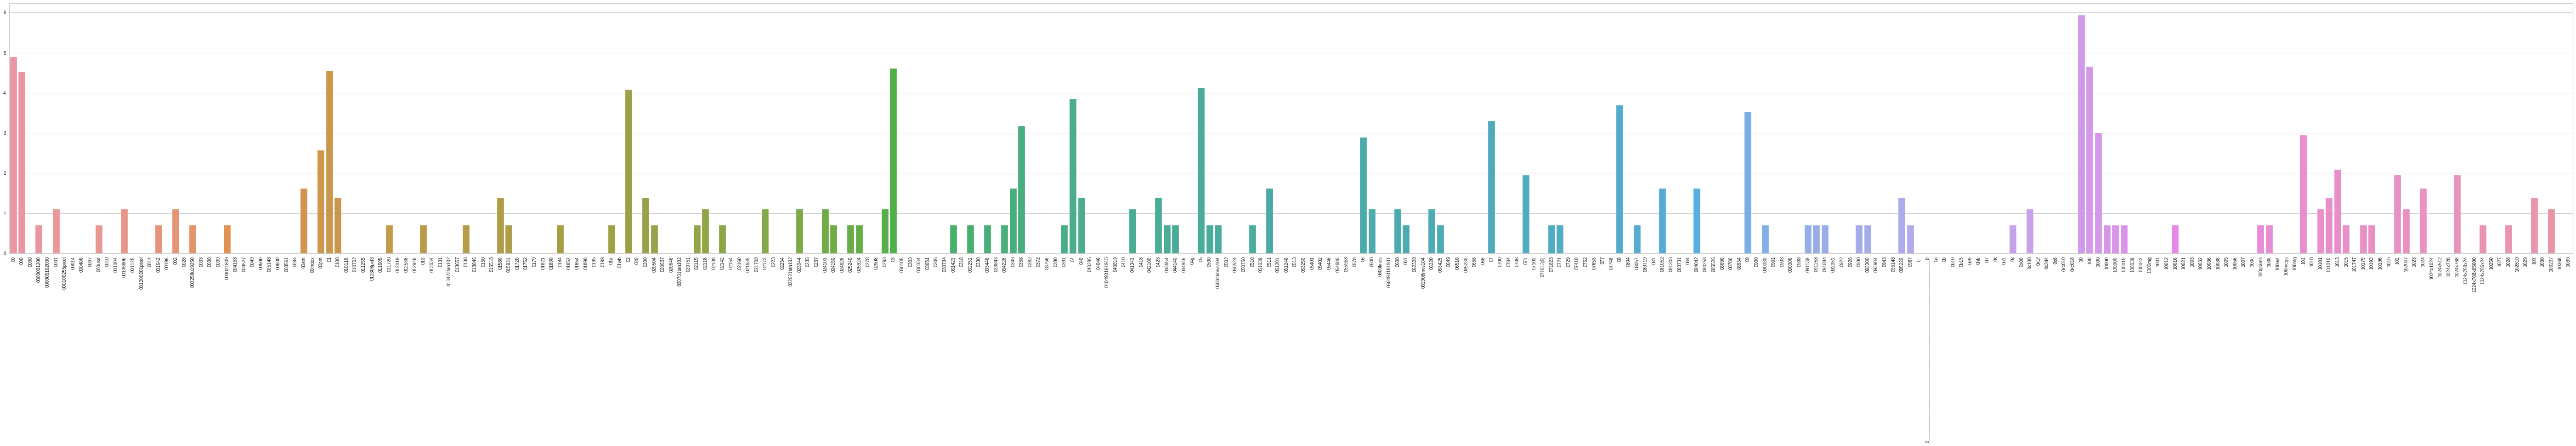

In [70]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300],
                y=term_frequencies_log[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90);

#**2. Follow the same process from the SNHC7450-Lab2-master Repo on the new dataset**


## **Part 1. Data Analysis and Visualization**

###**1.1. Data Transformation**

####**1.1.1. Load Data**

In [71]:
cd 'drive/My Drive/SN'

/content/drive/My Drive/SN


In [72]:
ll

total 6775987
-rw------- 1 root       1040 Jan  6 17:21  data_mining_helpers.py
drwx------ 2 root       4096 Jan  6 16:20  dataset/
-rw------- 1 root 3644258522 Jan  6 17:40  GoogleNews-vectors-negative300.bin
-rw------- 1 root 1647046227 Jan  6 17:27 'GoogleNews-vectors-negative300.bin (1).gz'
-rw------- 1 root 1647046227 Jan  6 17:10  GoogleNews-vectors-negative300.bin.gz
drwx------ 2 root       4096 Jan  6 17:26  logs/
drwx------ 8 root       4096 Dec 29 10:25  SNHC7450_Lab2_master-main/
-rw------- 1 root      50870 Jan  6 17:26  test_df.pkl
-rw------- 1 root     193134 Jan  6 17:26  train_df.pkl


In [73]:
ll 'dataset/'

total 202
-rw------- 1 root 58226 Jul  5  2016 amazon_cells_labelled.txt
-rw------- 1 root 85285 Feb 14  2015 imdb_labelled.txt
-rw------- 1 root  1070 May 30  2015 readme.txt
-rw------- 1 root 61320 Jul  5  2016 yelp_labelled.txt


In [74]:
class Sentence:
    def __init__(self):
        self.sid = []
        self.data = []
        self.score =[]
        self.score_name =[]

# location of the data (in drive)
dataset_files = ['dataset/amazon_cells_labelled.txt', 
                 'dataset/imdb_labelled.txt', 
                 'dataset/yelp_labelled.txt']

sentence = Sentence()

In [75]:
import re

In [76]:
for fileName in dataset_files:
    with open (fileName, encoding = 'utf8') as input_fs:
        # Use last digit in sentence (RegularExperssion)
        pattern = re.compile(r"(\d+)$")
        for index, line in enumerate(input_fs):
            sentence.sid.append(index)
            sentence.data.append(line.rsplit('\t', 1)[0])
            has = pattern.search(line)
            sentence.score.append(has.group(0))
            if (has.group(0)== "1"):
                sentence.score_name.append("Positive")
            else:
                sentence.score_name.append("Negative")

#### **Convert Dataset into Dataframe**

In [77]:
data_df= pd.DataFrame.from_records(dmh.format_rows(sentence), columns= ['sentences'])

#### **Adding New Column**

In [78]:
data_df['score']=sentence.score
data_df['score_name']=sentence.score_name

In [79]:
data_df.head()

sentences score score_name
0  So there is no way for me to plug it in here i...     0   Negative
1                        Good case, Excellent value.     1   Positive
2                             Great for the jawbone.     1   Positive
3  Tied to charger for conversations lasting more...     0   Negative
4                                  The mic is great.     1   Positive

In [80]:
#Check to make sure my data is correct
len(data_df)

3000

####**1.1.2. Familiarizing with the Data**

In [81]:
data_df[0:10][["sentences","score_name"]]

sentences score_name
0  So there is no way for me to plug it in here i...   Negative
1                        Good case, Excellent value.   Positive
2                             Great for the jawbone.   Positive
3  Tied to charger for conversations lasting more...   Negative
4                                  The mic is great.   Positive
5  I have to jiggle the plug to get it to line up...   Negative
6  If you have several dozen or several hundred c...   Negative
7        If you are Razr owner...you must have this!   Positive
8                Needless to say, I wasted my money.   Negative
9                   What a waste of money and time!.   Negative

In [82]:
data_df[0:10]['score']

0    0
1    1
2    1
3    0
4    1
5    0
6    0
7    1
8    0
9    0
Name: score, dtype: object

In [83]:
data_df.iloc[::10, :][0:10]

sentences score score_name
0   So there is no way for me to plug it in here i...     0   Negative
10                    And the sound quality is great.     1   Positive
20  I went on Motorola's website and followed all ...     0   Negative
30  This is a simple little phone to use, but the ...     0   Negative
40  It has a great camera thats 2MP, and the pics ...     1   Positive
50  Not loud enough and doesn't turn on like it sh...     0   Negative
60  Essentially you can forget Microsoft's tech su...     0   Negative
70                                  Mic Doesn't work.     0   Negative
80      I wear it everyday and it holds up very well.     1   Positive
90  For a product that costs as much as this one d...     0   Negative

In [84]:
print(type(data_df['score']))

<class 'pandas.core.series.Series'>


In [85]:
data_df.sort_values(by = "score")

sentences score score_name
0     So there is no way for me to plug it in here i...     0   Negative
1598  Every element of this story was so over the to...     0   Negative
1591  Which is precisely why I am giving it such a b...     0   Negative
1590   I can't believe there's even a sequel to this!       0   Negative
1589  Beware: this is not a trashy cult movie, this ...     0   Negative
...                                                 ...   ...        ...
591                  Linked to my phone without effort.     1   Positive
1775                     You won't forget this movie!       1   Positive
1774  Also the music by Mark Snow is possibly the be...     1   Positive
1772  You learn a lot about the real inside emotions...     1   Positive
1499  Later I found myself lost in the power of the ...     1   Positive

[3000 rows x 3 columns]

#### **Exercise 1** 
>Try to fecth records belonging to the ```positive``` category, and query every 10th record. Only show the first 5 records.

In [86]:
#To filter the records which only belong to "positive"
data_df_filter=data_df.loc[data_df.score_name == "Positive"]

In [87]:
#Only show first 5 category
data_df_filter[0:5]

sentences score score_name
1                   Good case, Excellent value.     1   Positive
2                        Great for the jawbone.     1   Positive
4                             The mic is great.     1   Positive
7   If you are Razr owner...you must have this!     1   Positive
10              And the sound quality is great.     1   Positive

###**1.2. Data Mining using Pandas**

####**1.2.1. Dealing with Missing Values**

In [88]:
data_df.isnull().any(axis=1)

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [89]:
data_df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences  ...                          score_name
0  The amoung of missing records is:   ...  The amoung of missing records is: 
1                                   0  ...                                   0

[2 rows x 3 columns]

In [90]:
# show the missing value in row
data_df[data_df.isnull().any(axis=1)]

Empty DataFrame
Columns: [sentences, score, score_name]
Index: []

In [91]:
dummy_series = pd.Series(["dummy_record", 1], index=["sentences", "score"])

In [92]:
dummy_series

sentences    dummy_record
score                   1
dtype: object

In [93]:
result_with_series = data_df.append(dummy_series, ignore_index=True)

In [94]:
len(result_with_series)

3001

In [95]:
result_with_series.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences  ...                          score_name
0  The amoung of missing records is:   ...  The amoung of missing records is: 
1                                   0  ...                                   1

[2 rows x 3 columns]

In [96]:
dummy_dict = [{'sentences': 'dummy_record',
               'score': 1
              }]

In [97]:
data_df = data_df.append(dummy_dict,ignore_index=True)

In [98]:
len(data_df)

3001

In [99]:
data_df.dropna(inplace=True)

In [100]:
data_df.isnull().apply(lambda x: dmh.check_missing_values(x))

sentences  ...                          score_name
0  The amoung of missing records is:   ...  The amoung of missing records is: 
1                                   0  ...                                   0

[2 rows x 3 columns]

#### **Exercise 2** 
>There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.
>Please check the data and the process below, describe what you observe and why it happened.   
>$Hint$ :  why `.isnull()` didn't work?

In [101]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B', },               
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

id missing_example
0  A             NaN
1  B             NaN
2  C             NaN
3  D            None
4  E            None
5  F

In [102]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

**Answer**
>This happen because empty values such as ( ), { }, [ ],"  ", 0, and value 'Nan' and 'None' will always return **False**. And return **True** on a boolean same-sized object indicating if the values are **NA**. Which is **NA** here is NA values, such as None or numpy.

For example : 
>Its return **True** on index 0,1,and 4 because :
*   index 0 because it's an NA values (np.nan).
*   index 1 because it's an NA values
*   index 4 because None also consider as NA values

> It's return **False** on index 2, 3, and 5 because :
*   index 2 it's an empty string. An empty string is not considered as NA values
*   index 3 it's an string values. Everything inside '' is considered as string values.
*   index 5 it's an empty string. An empty string is not considered as NA values.





####**1.2.2. Dealing with Duplicate Data**

In [103]:
data_df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2995    False
2996    False
2997    False
2998    False
2999    False
Length: 3000, dtype: bool

In [104]:
sum(data_df.duplicated())

17

In [105]:
sum(data_df.duplicated('sentences'))

17

In [106]:
len(data_df)

3000

In [107]:
data_df.drop_duplicates(keep=False, inplace=True)

In [108]:
len(data_df)

2966

###**1.3. Data Preprocessing**

####**1.3.1. Sampling**

In [109]:
data_df_sample = data_df.sample(n=1000)

In [110]:
len(data_df_sample)

1000

In [111]:
sum(data_df['score_name']=='Positive')+sum(data_df['score_name']=='Negative')

2966

In [112]:
from collections import Counter, OrderedDict

In [113]:
def get_tokens_and_frequency(token_list):
    """obtain word frequecy from pandas dataframe column of lists"""
    counter = Counter(token_list)
    counter = OrderedDict(counter.most_common()) # sort by value
    tokens = counter.keys()
    tokens_count = counter.values()

    return tokens, tokens_count

In [114]:
X_score_counts = get_tokens_and_frequency(list(data_df.score_name))
X_sample_score_counts = get_tokens_and_frequency(list(data_df_sample.score_name))

In [115]:
print(list(data_df['score_name'][0:10]))

['Negative', 'Positive', 'Positive', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative']


In [116]:
data_df.head()

sentences score score_name
0  So there is no way for me to plug it in here i...     0   Negative
1                        Good case, Excellent value.     1   Positive
2                             Great for the jawbone.     1   Positive
3  Tied to charger for conversations lasting more...     0   Negative
4                                  The mic is great.     1   Positive

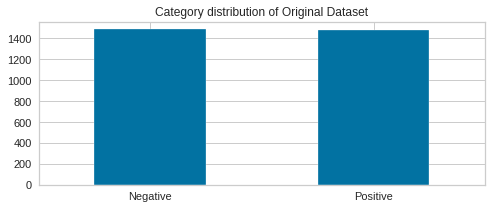

In [117]:
#X_newds['score_name'].value_counts().plot(kind='bar', rot=0)
X_ori_nds=data_df.score_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution of Original Dataset',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

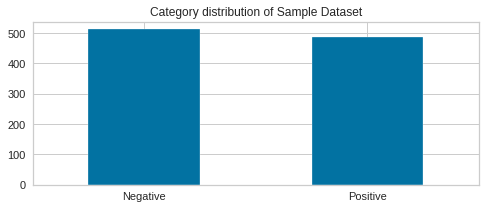

In [118]:
X_ori_nds_sample=data_df_sample.score_name.value_counts().plot(kind = 'bar',
                                    title = 'Category distribution of Sample Dataset',       
                                    rot = 0, fontsize = 11, figsize = (8,3))

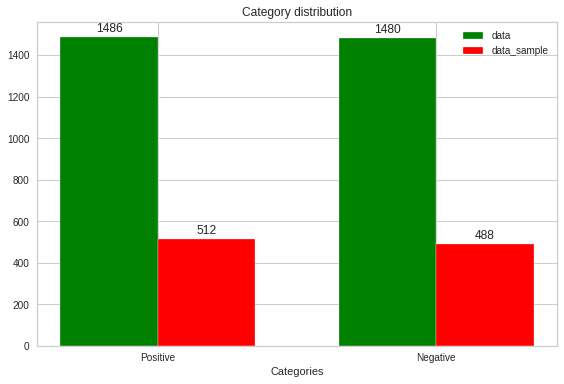

In [119]:
fig, ax = plt.subplots()
sn=['Positive','Negative']
x=np.arange(len(sn))
width=0.35
rects1 = ax.bar(x - width/2, data_df.score_name.value_counts(), width, label='data',color='green')
rects2 = ax.bar(x + width/2, data_df_sample.score_name.value_counts(), width, label='data_sample',color='red')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Categories')
ax.set_title('Category distribution')
ax.set_xticks(x)
ax.set_xticklabels(sn)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
autolabel(rects1)
autolabel(rects2)
fig.tight_layout()
plt.show()

#### **Exercise 3** 
>We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for.

#####**Preparation**

In [120]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="ticks", color_codes=True)

In [121]:
data_df_sample = data_df.sample(n=1000) #random state

In [122]:
len(data_df_sample)

1000

In [123]:
data_df_sample[0:4]

sentences score score_name
913                              Couldn't figure it out     0   Negative
1217  Secondly, Hitchcock pretty much perfected the ...     1   Positive
1911                        This is not movie-making.       0   Negative
2101  The only good thing was our waiter, he was ver...     1   Positive

Negative    1486
Positive    1480
Name: score_name, dtype: int64


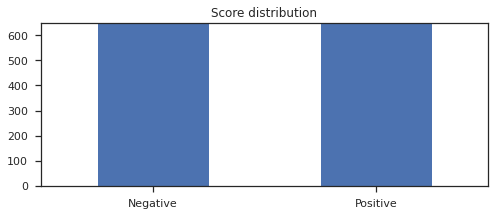

In [124]:
print(data_df.score_name.value_counts())

# plot barchart for X_sample
data_df_ori=data_df.score_name.value_counts().plot(kind = 'bar',
                                    title = 'Score distribution',
                                    ylim = [0, 650],        
                                    rot = 0, fontsize = 11, figsize = (8,3))

Positive    504
Negative    496
Name: score_name, dtype: int64


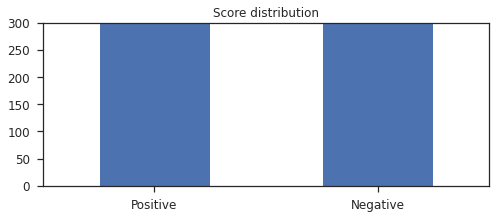

In [125]:
print(data_df_sample.score_name.value_counts())

# plot barchart for X_sample
data_df_samp=data_df_sample.score_name.value_counts().plot(kind = 'bar',
                                           title = 'Score distribution',
                                           ylim = [0, 300], 
                                           rot = 0, fontsize = 12, figsize = (8,3))

######**Chart of side-by-side comparison of the distribution between the two datasets**

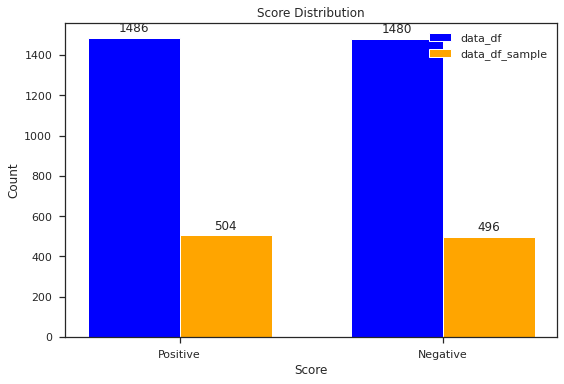

In [126]:
labels = ['Positive', 'Negative']

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, data_df.score_name.value_counts(), width, label='data_df', color='blue')
rects2 = ax.bar(x + width/2, data_df_sample.score_name.value_counts(), width, label='data_df_sample', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_xlabel('Score')
ax.set_title('Score Distribution')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

####**1.3.2. Feature Creation**

In [127]:
# takes a like a minute or two to process
data_df['unigrams'] = data_df['sentences'].apply(lambda x: dmh.tokenize_text(x))

In [128]:
data_df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [129]:
list(data_df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

####**1.3.3. Feature Subset Selection**

In [130]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

In [131]:
X_counts_nds = count_vect.fit_transform(data_df.sentences)

In [132]:
X_counts_nds

<2966x5153 sparse matrix of type '<class 'numpy.int64'>'
	with 31452 stored elements in Compressed Sparse Row format>

In [133]:
analyze(" ".join(list(data_df[4:5].sentences)))

['the', 'mic', 'is', 'great']

#### **Exercise 4**
>Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

#####**Preparation**

In [134]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [135]:
# takes a like a minute or two to process
data_df['unigrams'] = data_df['sentences'].apply(lambda x: dmh.tokenize_text(x))

In [136]:
data_df[0:4]["unigrams"]

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [137]:
data_df[0:4]

sentences  ...                                           unigrams
0  So there is no way for me to plug it in here i...  ...  [So, there, is, no, way, for, me, to, plug, it...
1                        Good case, Excellent value.  ...               [Good, case, ,, Excellent, value, .]
2                             Great for the jawbone.  ...                      [Great, for, the, jawbone, .]
3  Tied to charger for conversations lasting more...  ...  [Tied, to, charger, for, conversations, lastin...

[4 rows x 4 columns]

In [138]:
list(data_df[0:1]['unigrams'])

[['So',
  'there',
  'is',
  'no',
  'way',
  'for',
  'me',
  'to',
  'plug',
  'it',
  'in',
  'here',
  'in',
  'the',
  'US',
  'unless',
  'I',
  'go',
  'by',
  'a',
  'converter',
  '.']]

In [139]:
#Feature subset selection
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
data_df_counts = count_vect.fit_transform(data_df.sentences)

In [140]:
#use the default analyzer provided by CountVectorizer
analyze = count_vect.build_analyzer()
analyze("Hello World!")

['hello', 'world']

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



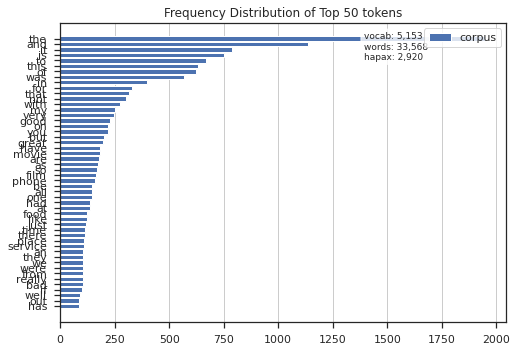

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [141]:
features_names=count_vect.get_feature_names()
visualizer = FreqDistVisualizer(features=features_names)
visualizer.fit(X_counts_nds)
visualizer.poof()

#### Now let us look at the term-document matrix we built above.

In [142]:
#Check shape
X_counts_nds.shape

(2966, 5153)

In [143]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

In [144]:
data_df[0:10]

sentences  ...                                           unigrams
0  So there is no way for me to plug it in here i...  ...  [So, there, is, no, way, for, me, to, plug, it...
1                        Good case, Excellent value.  ...               [Good, case, ,, Excellent, value, .]
2                             Great for the jawbone.  ...                      [Great, for, the, jawbone, .]
3  Tied to charger for conversations lasting more...  ...  [Tied, to, charger, for, conversations, lastin...
4                                  The mic is great.  ...                           [The, mic, is, great, .]
5  I have to jiggle the plug to get it to line up...  ...  [I, have, to, jiggle, the, plug, to, get, it, ...
6  If you have several dozen or several hundred c...  ...  [If, you, have, several, dozen, or, several, h...
7        If you are Razr owner...you must have this!  ...  [If, you, are, Razr, owner, ..., you, must, ha...
8                Needless to say, I wasted my money.  ...    [Needless, to, say, ,, I, wasted, my, money, .]
9                   What a waste of money and time!.  ...       [What, a, waste, of, money, and, time, !, .]

[10 rows x 4 columns]

In [145]:
# we convert from sparse array to normal array
X_counts_nds[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

In [146]:
corpus4_nds=X_counts_nds[0:5,0:100].toarray()

In [147]:
count_vect.transform(['Something completely new.']).toarray()

array([[0, 0, 0, ..., 0, 0, 0]])

In [148]:
count_vect.transform(['00 Something completely new.']).toarray()

array([[1, 0, 0, ..., 0, 0, 0]])

In [149]:
plot_x_nds = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]

In [150]:
plot_x_nds

['term_00',
 'term_10',
 'term_100',
 'term_11',
 'term_12',
 'term_13',
 'term_15',
 'term_15g',
 'term_15pm',
 'term_17',
 'term_18',
 'term_18th',
 'term_1928',
 'term_1947',
 'term_1948',
 'term_1949',
 'term_1971',
 'term_1973',
 'term_1979',
 'term_1980']

In [151]:
plot_y_nds = ["sentences_"+ str(i) for i in list(data_df.index)[0:20]]

In [152]:
plot_z_nds = X_counts_nds[0:20, 0:20].toarray() # first 20 terms 
plot_z_nds

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0,

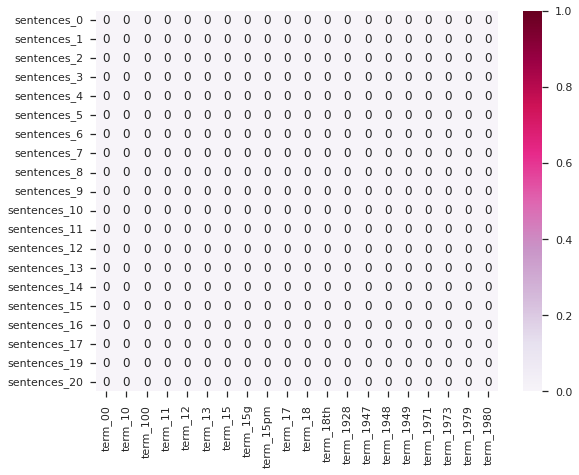

In [153]:
import seaborn as sns

df_todraw = pd.DataFrame(plot_z_nds, columns = plot_x_nds, index = plot_y_nds)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

#### **Exercise 5** 
>From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

We had a memory issue when we had to plot multiple vocabularies utilizing SNS heatmap, and we couldn't read the graph clearly. To make that work go faster, I'll employ a token frequency distribution visualizer, which can count any observable event. So, using CountVectorizer, I tokenize and vectorize the corpus data, then create a FreqDisctVisualizer object and call fit() on it with the count vectorized documents and the features (i.e. the words from the corpus) to compute the frequency distribution. The top 50 most frequent things in the corpus will be displayed, with terms listed along the y-axis and frequency counts shown at the x-axis values.

In [154]:
import yellowbrick
from yellowbrick.text import FreqDistVisualizer

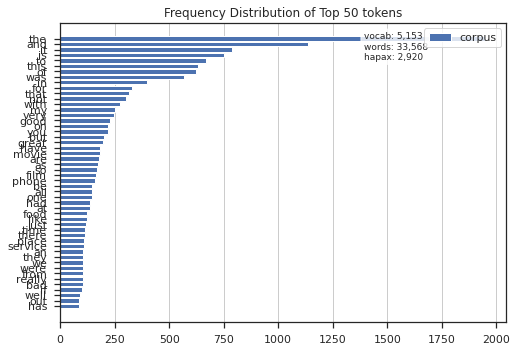

<AxesSubplot:title={'center':'Frequency Distribution of Top 50 tokens'}>

In [155]:
features_names=count_vect.get_feature_names_out()
visualizer = FreqDistVisualizer(features=features_names)
visualizer.fit(data_df_counts)
visualizer.poof()

Or if we want only to know the most frequent term we can also using worldcloud to visualize our data.

In [156]:
#Worldcloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

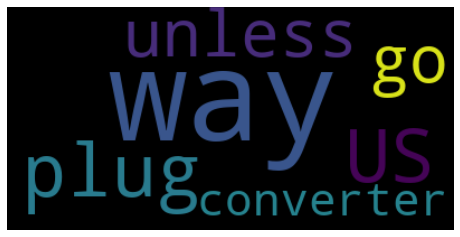

In [157]:
#displaying only word in index 0

textnora = data_df.sentences[0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(textnora)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

####**1.3.4. Dimensionality Reduction**

[PCA Algorithm](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)

In [158]:
from sklearn.decomposition import PCA

In [159]:
X_reduced_nds = PCA(n_components=2).fit_transform(X_counts_nds.toarray())

In [160]:
X_reduced_nds.shape

(2966, 2)

Text(0, 0.5, '\nY Label')

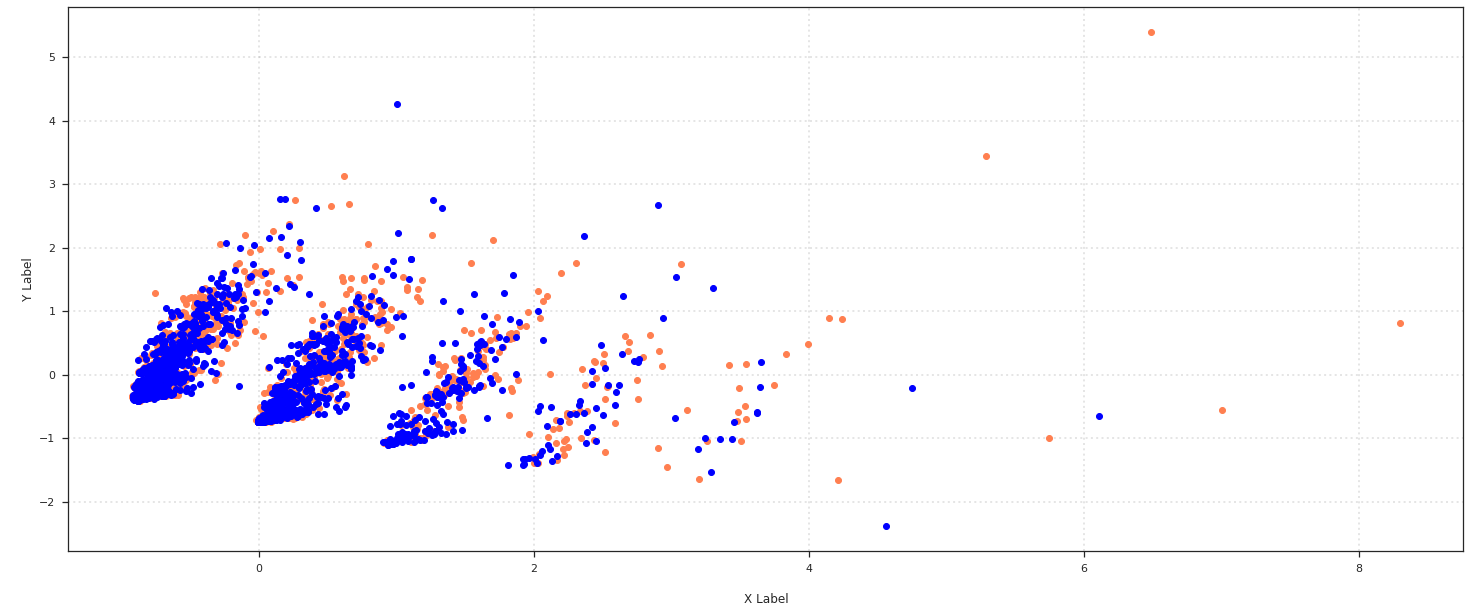

In [161]:
col = ['coral', 'blue', 'black', 'm']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, sn):
    xs = X_reduced_nds[data_df['score_name'] == category].T[0]
    ys = X_reduced_nds[data_df['score_name'] == category].T[1]
   
    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')


####**Exercise 6-1**
>Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

>$Hint$: you can refer to Axes3D in the documentation.

#####**Preparation & Answer**

In [162]:
from sklearn.decomposition import PCA
data_df_reduced_new = PCA(n_components = 3).fit_transform(data_df_counts.toarray())
data_df_reduced_new.shape

(2966, 3)

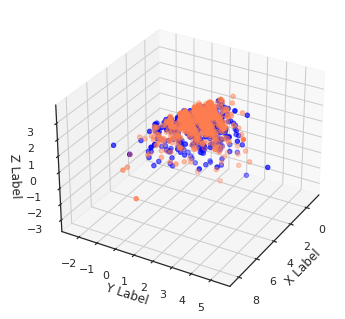

In [163]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, sn):
    xs = data_df_reduced_new[data_df['score_name'] == category].T[0]
    ys = data_df_reduced_new[data_df['score_name'] == category].T[1]
    zs = data_df_reduced_new[data_df['score_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=30)
plt.show()

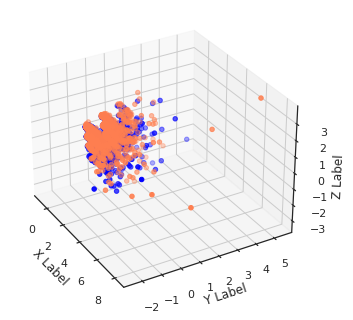

In [164]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, sn):
    xs = data_df_reduced_new[data_df['score_name'] == category].T[0]
    ys = data_df_reduced_new[data_df['score_name'] == category].T[1]
    zs = data_df_reduced_new[data_df['score_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=-30)
plt.show()

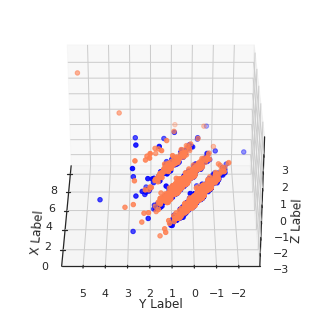

In [165]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for c, category in zip(col, sn):
    xs = data_df_reduced_new[data_df['score_name'] == category].T[0]
    ys = data_df_reduced_new[data_df['score_name'] == category].T[1]
    zs = data_df_reduced_new[data_df['score_name'] == category].T[2]

    ax.scatter(xs, ys, zs, c = c, marker='o')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(azim=180)
plt.show()

####**1.3.5. Atrribute Transformation / Aggregation**

In [166]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies_nds = []
for j in range(0,X_counts_nds.shape[1]):
    term_frequencies_nds.append(sum(X_counts_nds[:,j].toarray()))

In [167]:
term_frequencies_nds = np.asarray(X_counts_nds.sum(axis=0))[0]

In [168]:
term_frequencies_nds[0]

1

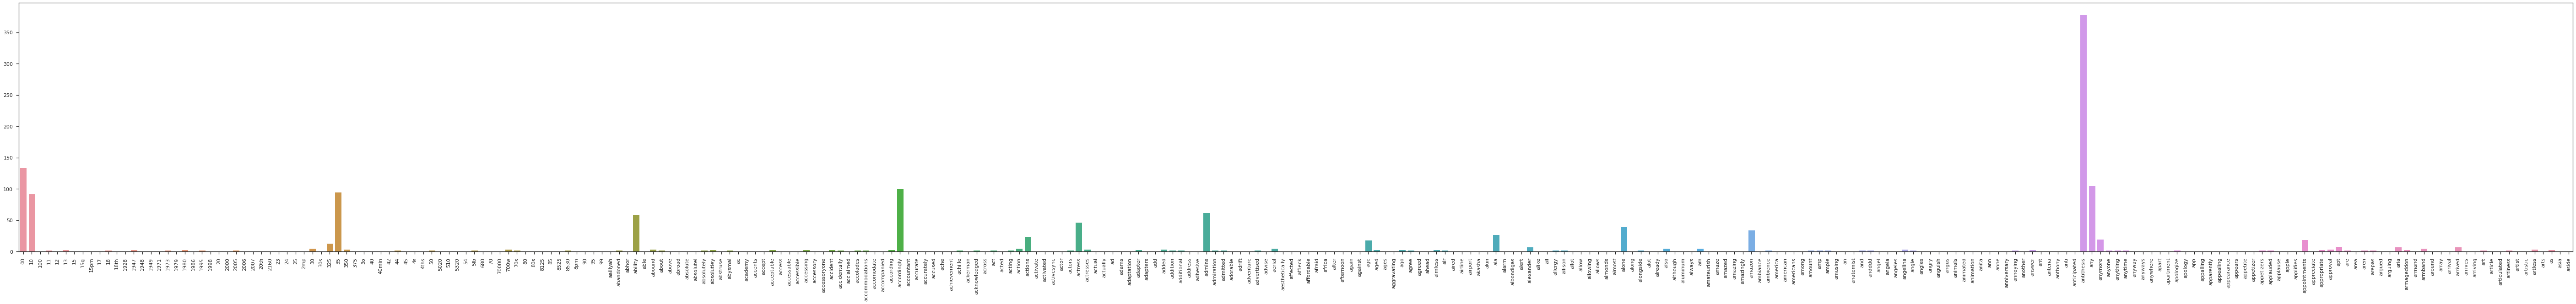

In [169]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

####**Exercise 6-2** 
>The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize using plotly.


In [170]:
!pip install chart_studio

In [171]:
import chart_studio.plotly as py
import plotly.graph_objs as go

In [172]:
from plotly.offline import iplot

In [173]:
def get_trace(X_pca, data, category, color):
    """ Build trace for plotly chart based on category """
    trace = go.Scatter3d(
        x=X_pca[data.apply(lambda x: True if x==category else False),0],
        y=X_pca[data.apply(lambda x: True if x==category else False),1],
        z=X_pca[data.apply(lambda x: True if x==category else False),2],
        mode='markers',
        marker=dict(
            size=4,
            line=dict(
                color=color,
                width=0.2
            ),
            opacity=0.8
        ),
        text=data[data.apply(lambda x: True if x==category else False).tolist()]
    )
    return trace

In [175]:
trace1 = get_trace(data_df_reduced_new, data_df["score_name"], "Positive", "rgb(71,233,163)")
trace2 = get_trace(data_df_reduced_new, data_df["score_name"], "Negative", "rgb(52,133,252)")


In [176]:
data = [trace1, trace2]

In [177]:
layout = go.Layout(margin=dict(l=0, r=0, b=0, t=0))
fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='simple-3d-scatter')

####**Exercise 7** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

##### **Answer**

In [178]:
# sort terms  in descending order
list1, list2 = zip(*sorted(zip(list1, list2 ),reverse=True))

iplot(plot_word_frequency([list2, list1[0:500]],
                                "Term Frequency Distribution, first 500 terms(Descending order)"))

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




In [179]:
term_frequencies_log_nds = [math.log(i) for i in term_frequencies_nds]

In [180]:
iplot(plot_word_frequency([count_vect.get_feature_names_out(), term_frequencies_log_nds],
                                "Term Frequency Distribution"))

/usr/local/lib/python3.7/dist-packages/plotly/graph_objs/_deprecations.py:40: DeprecationWarning:

plotly.graph_objs.Data is deprecated.
Please replace it with a list or tuple of instances of the following types
  - plotly.graph_objs.Scatter
  - plotly.graph_objs.Bar
  - plotly.graph_objs.Area
  - plotly.graph_objs.Histogram
  - etc.




####**1.3.6 Discretization and Binarization**

In [181]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

In [182]:
mlb = preprocessing.LabelBinarizer()

In [183]:
mlb.fit(data_df.score)

LabelBinarizer()

In [184]:
mlb.classes_

array(['0', '1'], dtype='<U1')

In [185]:
data_df['bin_score'] = mlb.transform(data_df['score']).tolist()

In [186]:
data_df[0:10]

sentences  ... bin_score
0  So there is no way for me to plug it in here i...  ...       [0]
1                        Good case, Excellent value.  ...       [1]
2                             Great for the jawbone.  ...       [1]
3  Tied to charger for conversations lasting more...  ...       [0]
4                                  The mic is great.  ...       [1]
5  I have to jiggle the plug to get it to line up...  ...       [0]
6  If you have several dozen or several hundred c...  ...       [0]
7        If you are Razr owner...you must have this!  ...       [1]
8                Needless to say, I wasted my money.  ...       [0]
9                   What a waste of money and time!.  ...       [0]

[10 rows x 5 columns]

In [187]:
mlb.fit(data_df.score_name)

LabelBinarizer()

In [188]:
mlb.classes_

array(['Negative', 'Positive'], dtype='<U8')

In [189]:
data_df['bin_category2'] = mlb.transform(data_df['score_name']).tolist()

In [190]:
data_df[0:10]

sentences  ... bin_category2
0  So there is no way for me to plug it in here i...  ...           [0]
1                        Good case, Excellent value.  ...           [1]
2                             Great for the jawbone.  ...           [1]
3  Tied to charger for conversations lasting more...  ...           [0]
4                                  The mic is great.  ...           [1]
5  I have to jiggle the plug to get it to line up...  ...           [0]
6  If you have several dozen or several hundred c...  ...           [0]
7        If you are Razr owner...you must have this!  ...           [1]
8                Needless to say, I wasted my money.  ...           [0]
9                   What a waste of money and time!.  ...           [0]

[10 rows x 6 columns]

###**1.4. Data Exploration**

In [191]:
# We retrieve 2 sentences for a random record, here, indexed at 50 and 100
document_to_transform_1 = []
random_record_1 = data_df.iloc[50]
random_record_1 = random_record_1['sentences']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = data_df.iloc[100]
random_record_2 = random_record_2['sentences']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = data_df.iloc[150]
random_record_3 = random_record_3['sentences']
document_to_transform_3.append(random_record_3)

In [192]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

['good protection and does not make phone too bulky.']
['Buyer Beware, you could flush money right down the toilet.']
['Audio Quality is poor, very poor.']


In [193]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vecors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [194]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})

Cosine Similarity using count bw 1 and 2: 0.000000
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000


##**Part 2. Neural Word Embeddings**

### **2.1. Data Preparation**

####**2.1.1. Load Data**

In [196]:
data_df.head()

sentences  ... bin_category2
0  So there is no way for me to plug it in here i...  ...           [0]
1                        Good case, Excellent value.  ...           [1]
2                             Great for the jawbone.  ...           [1]
3  Tied to charger for conversations lasting more...  ...           [0]
4                                  The mic is great.  ...           [1]

[5 rows x 6 columns]

In [197]:
data_df_nn= data_df[['sentences','score']]

In [198]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data_df_nn, test_size=0.2, random_state=True)

In [199]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [200]:
train_df.head()

sentences score
0  My experience was terrible..... This was my fo...     0
1  Sam Shepard's portrayal of a gung ho Marine wa...     1
2  I've had no trouble accessing the Internet, do...     1
3  The price is reasonable and the service is great.     1
4  Great food and service, huge portions and they...     1

In [201]:
test_df.head()

sentences score
0  This film highlights the fundamental flaws of ...     1
1  Small, sleek, impressive looking, practical se...     1
2                   Of course, the acting is blah.       0
3                I had to purchase a different case.     0
4  I was very pleased to see that I could replace...     1

In [202]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [203]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (2372, 2)
Shape of Testing df:  (594, 2)


####**2.1.2. Save data**

In [204]:
## save to pickle file
train_df.to_pickle("train_df.pkl") 
test_df.to_pickle("test_df.pkl")

In [205]:
## load a pickle file
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [206]:
#group to find distribution
train_df.groupby(['score']).count()['sentences']

score
0    1187
1    1185
Name: sentences, dtype: int64

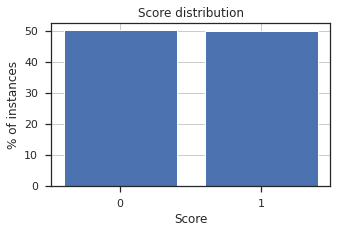

In [207]:
# the histogram of the data
labels = train_df['score'].unique()
post_total = len(train_df)
df1 = train_df.groupby(['score']).count()['sentences']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(5,3))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Score')
plt.title('Score distribution')
plt.grid(True)
plt.show()

### **2.2. Deep Learning**

#### **2.2.1. Prepare data (X, y)**

In [208]:
# build analyzers (bag-of-words)
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
BOW_500.fit(train_df['sentences'])

train_data_BOW_features_500 = BOW_500.transform(train_df['sentences'])

## check dimension
train_data_BOW_features_500.shape

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning:

The parameter 'token_pattern' will not be used since 'tokenizer' is not None'



(2372, 500)

In [209]:
import keras

# standardize name (X, y) 
X_train = BOW_500.transform(train_df['sentences'])
y_train = train_df['score']

X_test = BOW_500.transform(test_df['sentences'])
y_test = test_df['score']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (2372, 500)
y_train.shape:  (2372,)
X_test.shape:  (594, 500)
y_test.shape:  (594,)


#### **2.2.2. Deal with categorical label (y)**




In [210]:
## deal with label

from sklearn.preprocessing import LabelEncoder
from keras import utils as np_utils

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.np_utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)
print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

check label:  ['0' '1']

## Before convert
y_train[0:4]:
 2327    1
920     0
1842    1
1497    1
Name: score, dtype: object

y_train.shape:  (2372,)
y_test.shape:  (594,)


## After convert
y_train[0:4]:
 [[0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]

y_train.shape:  (2372, 2)
y_test.shape:  (594, 2)


#### **2.2.3. Build model**

In [211]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  2


In [212]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500)]             0         
                                                                 
 dense (Dense)               (None, 64)                32064     
                                                                 
 re_lu (ReLU)                (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 re_lu_1 (ReLU)              (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
 softmax (Softmax)           (None, 2)                 0     

#### **2.2.4. Train**

In [213]:
!pip install spektral

In [214]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('/content/drive/My Drive/SN/logs/training_log.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))

print('training finish')

Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:450: UserWarning:

Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.



75/75 [==============================] - 1s 6ms/step - loss: 0.6545 - accuracy: 0.6417 - val_loss: 0.5955 - val_accuracy: 0.7037
Epoch 2/25
75/75 [==============================] - 0s 4ms/step - loss: 0.4763 - accuracy: 0.8023 - val_loss: 0.5033 - val_accuracy: 0.7626
Epoch 3/25
75/75 [==============================] - 0s 4ms/step - loss: 0.3351 - accuracy: 0.8626 - val_loss: 0.5168 - val_accuracy: 0.7643
Epoch 4/25
75/75 [==============================] - 0s 4ms/step - loss: 0.2541 - accuracy: 0.9001 - val_loss: 0.5504 - val_accuracy: 0.7744
Epoch 5/25
75/75 [==============================] - 0s 3ms/step - loss: 0.1930 - accuracy: 0.9258 - val_loss: 0.6203 - val_accuracy: 0.7677
Epoch 6/25
75/75 [==============================] - 0s 4ms/step - loss: 0.1502 - accuracy: 0.9498 - val_loss: 0.6880 - val_accuracy: 0.7542
Epoch 7/25
75/75 [==============================] - 0s 3ms/step - loss: 0.1098 - accuracy: 0.9616 - val_loss: 0.7433 - val_accuracy: 0.7424
Epoch 8/25
75/75 [=============

####**2.2.5. Predict on testing data**

In [215]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[9.99792635e-01, 2.07341291e-04],
       [9.99785841e-01, 2.14116677e-04],
       [1.69017085e-08, 1.00000000e+00],
       [9.99956369e-01, 4.36125483e-05],
       [1.38947265e-02, 9.86105263e-01]], dtype=float32)

In [216]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['0', '0', '1', '0', '1'], dtype=object)

In [217]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.73


In [218]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("/content/drive/My Drive/SN/logs/training_log.csv")
training_log

epoch  accuracy      loss  val_accuracy  val_loss
0       0  0.641653  0.654496      0.703704  0.595533
1       1  0.802277  0.476258      0.762626  0.503282
2       2  0.862563  0.335087      0.764310  0.516849
3       3  0.900084  0.254101      0.774411  0.550443
4       4  0.925801  0.193021      0.767677  0.620306
5       5  0.949831  0.150185      0.754209  0.687998
6       6  0.961636  0.109821      0.742424  0.743273
7       7  0.978078  0.076728      0.744108  0.850377
8       8  0.984401  0.057053      0.752525  0.912376
9       9  0.989460  0.041079      0.754209  0.988629
10     10  0.990304  0.032310      0.745791  1.063395
11     11  0.993676  0.023409      0.730640  1.201898
12     12  0.994941  0.018819      0.749158  1.189730
13     13  0.994098  0.017313      0.747475  1.262896
14     14  0.994519  0.015566      0.745791  1.290616
15     15  0.994941  0.013271      0.745791  1.334855
16     16  0.996206  0.011367      0.740741  1.425989
17     17  0.997049  0.011409      0.737374  1.451997
18     18  0.997049  0.010187      0.734007  1.440647
19     19  0.996206  0.010924      0.735690  1.495788
20     20  0.996206  0.009017      0.735690  1.536071
21     21  0.996627  0.008367      0.732323  1.530593
22     22  0.996627  0.008085      0.739057  1.531370
23     23  0.997470  0.007907      0.739057  1.559160
24     24  0.997470  0.008297      0.732323  1.567414

### **Exercise 8** 
>Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


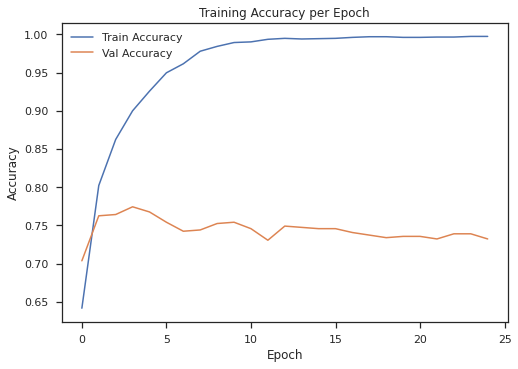

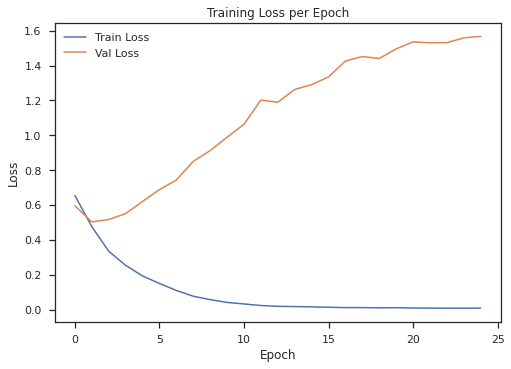

In [219]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy per Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train Accuracy', 'Val Accuracy'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss per Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Val Loss'], loc='upper left')
plt.show()

### **2.3. Word2Vector**

####**2.3.1. Prepare training corpus**

In [220]:
data_df.head()

sentences  ... bin_category2
0  So there is no way for me to plug it in here i...  ...           [0]
1                        Good case, Excellent value.  ...           [1]
2                             Great for the jawbone.  ...           [1]
3  Tied to charger for conversations lasting more...  ...           [0]
4                                  The mic is great.  ...           [1]

[5 rows x 6 columns]

In [221]:
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(data_df, test_size=0.2, random_state=True)

In [222]:
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [223]:
## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## the input type
train_df['text_tokenized'] = train_df['sentences'].apply(lambda x: nltk.word_tokenize(x))
train_df[['score', 'sentences', 'text_tokenized']].head()

score  ...                                     text_tokenized
0     0  ...  [My, experience, was, terrible, ..., .., This,...
1     1  ...  [Sam, Shepard, 's, portrayal, of, a, gung, ho,...
2     1  ...  [I, 've, had, no, trouble, accessing, the, Int...
3     1  ...  [The, price, is, reasonable, and, the, service...
4     1  ...  [Great, food, and, service, ,, huge, portions,...

[5 rows x 3 columns]

####**2.3.2 Training our model**

In [224]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:3]

array([list(['My', 'experience', 'was', 'terrible', '...', '..', 'This', 'was', 'my', 'fourth', 'bluetooth', 'headset', ',', 'and', 'while', 'it', 'was', 'much', 'more', 'comfortable', 'than', 'my', 'last', 'Jabra', '(', 'which', 'I', 'HATED', '!', '!', '!']),
       list(['Sam', 'Shepard', "'s", 'portrayal', 'of', 'a', 'gung', 'ho', 'Marine', 'was', 'sobering', '.']),
       list(['I', "'ve", 'had', 'no', 'trouble', 'accessing', 'the', 'Internet', ',', 'downloading', 'ringtones', 'or', 'performing', 'any', 'of', 'the', 'functions', '.'])],
      dtype=object)

In [225]:
from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

#### **2.3.3. Generating word vector (embeddings)**

In [226]:
# get the corresponding vector of a word
word_vec = word2vec_model.wv['happy']
word_vec

array([ 0.31927267,  0.07106923, -0.21918382,  0.21644616, -0.00690568,
        0.1545052 , -0.23389857,  0.3316666 ,  0.19909883,  0.04014964,
        0.2577568 , -0.2843633 , -0.32583463, -0.15568621,  0.11031625,
       -0.12252817,  0.15899591,  0.4499294 ,  0.01301453,  0.23365979,
       -0.02402314, -0.10000413,  0.21242811, -0.26813626,  0.01828226,
       -0.16932288,  0.0953243 , -0.31896248, -0.04007954,  0.13064367,
        0.04713091, -0.08041711,  0.02229879, -0.23346105,  0.06967138,
       -0.14333974,  0.11449559, -0.09546112,  0.09880394,  0.14252362,
        0.2831683 ,  0.2576264 ,  0.4438326 ,  0.21356884, -0.18739477,
       -0.36615813,  0.5575383 ,  0.08090315, -0.14514372, -0.20347114,
       -0.19704257,  0.02730413,  0.08575313, -0.00337518,  0.1888655 ,
        0.23295422,  0.18197583, -0.22984971,  0.14983293,  0.39088646,
       -0.1752648 , -0.11326988, -0.25777787,  0.20551397, -0.19280896,
        0.49861845,  0.22971465, -0.16397199,  0.02084389, -0.40

In [227]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[('still', 0.9987315535545349),
 ('then', 0.9986204504966736),
 ('received', 0.9985963106155396),
 ('loved', 0.9985812306404114),
 ('less', 0.998318612575531),
 ('5', 0.9982843995094299),
 ('hit', 0.9982774257659912),
 ('...', 0.9982593059539795),
 ('before', 0.9982525110244751),
 ('breakfast', 0.998247504234314)]

####**2.3.4 Using a pre-trained w2v model**

**Download model by myself**

In [228]:
!pip install wget

In [229]:
import wget
url = 'https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz'
filename = wget.download(url)

In [230]:
import gzip
f_in = gzip.open('GoogleNews-vectors-negative300.bin.gz', 'rb')
f_out = open('GoogleNews-vectors-negative300.bin', 'wb')
f_out.writelines(f_in)

In [231]:
import gensim
from gensim.models import Word2Vec, KeyedVectors
from sklearn.decomposition import PCA

w2v_google_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True,limit=100000)
print('Load OK')

w2v_google_model.most_similar('happy', topn=10)

Load OK


[('glad', 0.7408890128135681),
 ('pleased', 0.6632171273231506),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437950134277344),
 ('proud', 0.636042058467865),
 ('delighted', 0.627237856388092),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247666478157043)]

**Using gensim api**

In [232]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577817916870117),
 ('thank', 0.9376667141914368),
 ('welcome', 0.9336150288581848),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

####**2.3.5. king + woman - man = ?**

In [233]:
w2v_google_model.most_similar(positive=['king', 'woman'], negative=['man'])

[('queen', 0.7118192911148071),
 ('monarch', 0.6189674139022827),
 ('princess', 0.5902431011199951),
 ('crown_prince', 0.5499460697174072),
 ('prince', 0.5377321243286133),
 ('kings', 0.5236844420433044),
 ('queens', 0.518113374710083),
 ('sultan', 0.5098593235015869),
 ('monarchy', 0.5087411999702454),
 ('royal_palace', 0.5087165832519531)]

###**2.4. High-dimension Visualization: t-SNE**

####**2.4.1 Prepare visualizing target**

In [234]:
word_list = ['happy', 'angry', 'data', 'mining']

topn = 5
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
data_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('data', topn=topn)]        
mining_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('mining', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('data_words: ', data_words)
print('mining_words: ', mining_words)

target_words = happy_words + angry_words + data_words + mining_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed']
data_words:  ['data', 'Data', 'datasets', 'dataset', 'databases', 'statistics']
mining_words:  ['mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'data', 'Data', 'datasets', 'dataset', 'databases', 'statistics', 'mining', 'Mining', 'mines', 'coal_mining', 'mine', 'miner']

color list:
['b', 'b', 'b', 'b', 'b', 'b', 'g', 'g', 'g', 'g', 'g', 'g', 'r', 'r', 'r', 'r', 'r', 'r', 'y', 'y', 'y', 'y', 'y', 'y']


#### **2.4.2 Plot using t-SNE (2-dimension)**

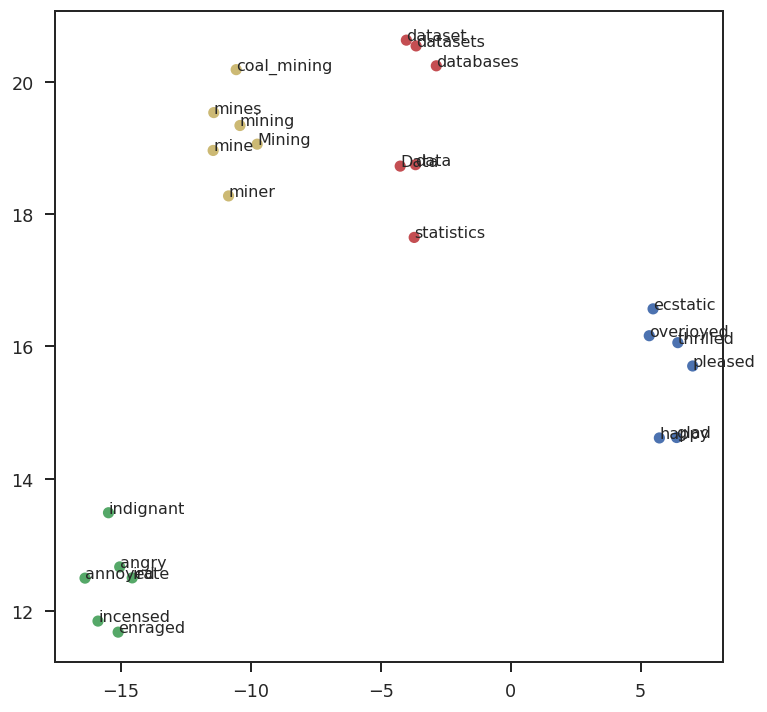

In [235]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

### **Exercise 9**
>Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total)

In [236]:
word_list = ['angry', 'happy', 'sad', 'fear']

topn = 14
angry_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['data'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['mining'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

angry_words:  ['happy', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
happy_words:  ['angry', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'elated', 'thankful', 'unhappy']
sad_words:  ['data', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'saddens_me', 'distressing', 'saddest', 'unfortunate', 'sorry', 'bittersweet', 'tragic', 'regretful', 'sadder', 'heartbroken']
fear_words:  ['mining', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']

target words: 
['happy', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'angry', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled

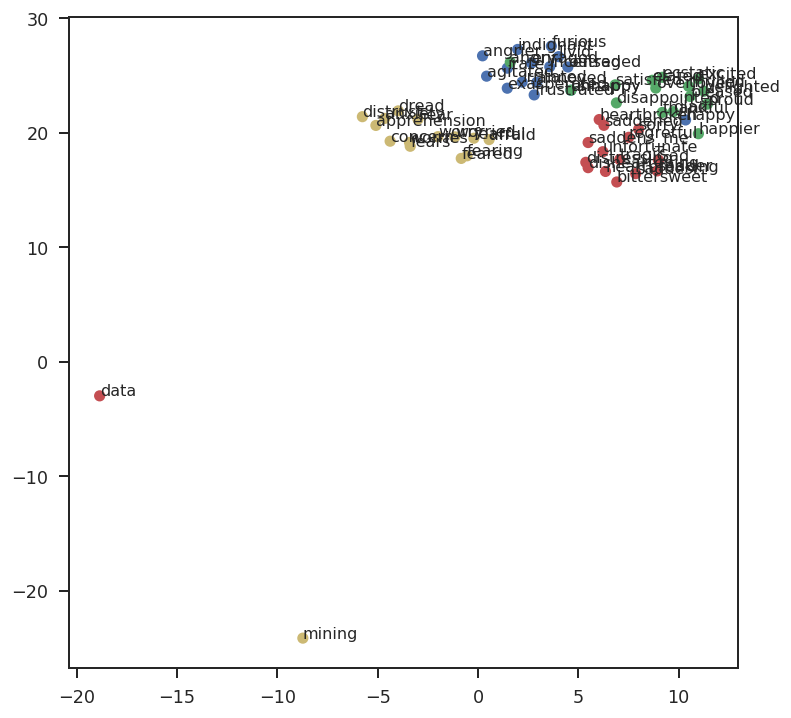

In [237]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

#**3. Attempt the following tasks on the new dataset**

##**3.1. Data Preparation**

In [248]:
data_df_wc = data_df[['sentences','score']]

In [249]:
data_df_wc.head()

sentences score
0  So there is no way for me to plug it in here i...     0
1                        Good case, Excellent value.     1
2                             Great for the jawbone.     1
3  Tied to charger for conversations lasting more...     0
4                                  The mic is great.     1

In [253]:
data_df_wc['score']=data_df_wc['score'].astype(int)

In [254]:
from sklearn.model_selection import train_test_split
X = data_df_wc['sentences']
y = data_df_wc['score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=True)

In [255]:
print ('Train samples shape :', X_train.shape)
print ('Train labels shape  :', y_train.shape)
print ('Test samples shape  :', X_test.shape)
print ('Test labels shape   :', y_test.shape)

Train samples shape : (2372,)
Train labels shape  : (2372,)
Test samples shape  : (594,)
Test labels shape   : (594,)


## **3.2. Generate Meaningful Data Visualization**


> In this part I generate different visualizations. I'm going to compute and plot the term frequency of all positive words in each positive statement.

In [256]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [257]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [258]:
# stopword: commonn words or unimportant words
stopword = stopwords.words('english')

tokens = []

# get tokens from each positive sentence
for sentence in (data_df_wc['sentences'][data_df_wc['score']==1]):
    tokens += dmh.tokenize_text(sentence.lower())

# remove tokens which are in the stopword list
tokens = [token for token in tokens if token not in stopword]

# Categorizing and Tagging Words
tokens_tags = nltk.pos_tag(tokens)

# get the positive tokens from all tokens
positive_tokens = [word for word, pos in tokens_tags if (pos == 'JJ' or pos =='RB')]

In [259]:
positive_tokens_dict = get_tokens_and_frequency(positive_tokens)
iplot(plot_word_frequency([list(positive_tokens_dict[0])[0:25],
                                 list(positive_tokens_dict[1])[0:25]], "Most 25 Positive Words Frequency distribution"))

In [260]:
def plot_word_cloud(text):
    """ Generate word cloud given some input text doc """
    word_cloud = WordCloud().generate(text)
    plt.figure(figsize=(8,6), dpi=90)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

In [261]:
from wordcloud import WordCloud

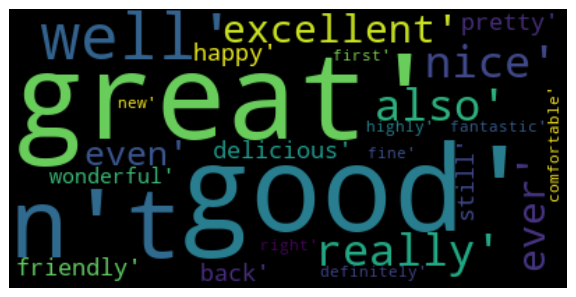

In [262]:
# Display Most 25 Positive Words
plot_word_cloud(str(list(positive_tokens_dict[0])[0:25]))

##**3.3. TF-IDF features**

In [263]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [264]:
count_vect = CountVectorizer()
data_df_counts = count_vect.fit_transform(data_df.sentences)

In [265]:
from sklearn.feature_extraction.text import TfidfTransformer
tf_transformer = TfidfTransformer(use_idf=False).fit(data_df_counts)
datasetnora_tf = tf_transformer.transform(data_df_counts)
datasetnora_tf.shape

(2966, 5153)

In [266]:
tfidf_transformer = TfidfTransformer()
datasetnora_tfidf = tfidf_transformer.fit_transform(data_df_counts)
datasetnora_tfidf.shape

(2966, 5153)

##**3.4. Naive Bayes classifier**

In this part, i will Implement a simple Naive Bayes classifier that automatically classifies the records into their categories using TF-IDF features and word frequency features to build two seperate classifiers.

###**3.4.1.TF-IDF features** 

In [267]:
#from time import time
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics

In [268]:
#Train
count_vect_t = TfidfVectorizer()
X_counts_train_tf = count_vect_t.fit_transform(X_train)

In [269]:
#TTest
X_counts_test_tf = count_vect_t.transform(X_test)

In [270]:
#NB
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_counts_train_tf, y_train)

MultinomialNB()

In [271]:
y_pred = naive_bayes_classifier.predict(X_counts_test_tf)

In [272]:
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

accuracy:   0.822


In [273]:
print(metrics.classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

    Positive       0.81      0.84      0.83       299
    Negative       0.83      0.80      0.82       295

    accuracy                           0.82       594
   macro avg       0.82      0.82      0.82       594
weighted avg       0.82      0.82      0.82       594

confusion matrix:
[[251  48]
 [ 58 237]]


###**3.4.2. Word Frequency Features**

In [274]:
count_vect = CountVectorizer()
X_counts_train_wf = count_vect.fit_transform(X_train)

In [275]:
X_counts_test_wf = count_vect.transform(X_test)

In [276]:
naive_bayes_classifier.fit(X_counts_train_wf, y_train)

MultinomialNB()

In [277]:
y_pred_wf = naive_bayes_classifier.predict(X_counts_test_wf)

In [278]:
score_wf = metrics.accuracy_score(y_test, y_pred_wf)
print("accuracy:   %0.3f" % score_wf)

accuracy:   0.825


In [279]:
print(metrics.classification_report(y_test, y_pred_wf, target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred_wf))


              precision    recall  f1-score   support

    Positive       0.82      0.83      0.83       299
    Negative       0.83      0.82      0.82       295

    accuracy                           0.82       594
   macro avg       0.82      0.82      0.82       594
weighted avg       0.82      0.82      0.82       594

confusion matrix:
[[248  51]
 [ 53 242]]


**Comment**
> Both TFIDFvectorizer and countvector has function to convert text data into vectors because model can only process numerical data. The different is in countervectorizer perform task counting and tokenizing and its only count how many times word appears in the document which can result some bias and ignoring the "rare" word that might be helpfull in processsing our data. TFIDF transformer can normalized the data. And in other hand, TFIDFvectorizer execute all three task ( counting, tokenizing and normalizing) making NLP task more efficient.

> In other word, TF-IDF is preferable than Count Vectorizers because its not only considers the frequency of words found in the corpus, but also their relevance. We may then delete the terms that aren't as significant for analysis, lowering the model's input dimensions and making it easier to build.